## 3. Advertising Sales Channel Prediction
### Problem Statement:
#### Sales Channel Prediction Case Study  
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 
The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  


## Import required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore')

## Load the dataset and read it

In [2]:
df=pd.read_csv(r"C:\Users\dell\Desktop\Data Trained Projects\Project 3\Advertising.csv")
df.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Shape of the dataset

In [3]:
df.shape

(200, 5)

##### Observations:
1. This shows that the train is imported successfully.
2. The train data consists of 200 training examples with 5 features.

## General Information of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Here in every column there are 200 non-null floaat value except "Unnamed: 0". It is of integer data type that also has 200 records.

## Statistical Discription of the dataset

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Check for Null values

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

here we can see there are no null values.

In [7]:
df.columns.tolist()

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

##### Observation:

Unnamed: 0 :- It is nominal variable that is not needed.
    
TV: It is the colmns through which the sales of the production are dependent while it is independent & is our feature.
    
radio: It is the colmns through which the sales of the production are dependent while it is independent & is our feature.
    
newspaper: It is the column through which sales of the production are dependent while it is independent & is our feature 
    
sales: It is our label i.e. dependent on all features.
    
ALL the columns are continous. And our label is continous variable too, hence it a regression problem.

## Data Preprocessing

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Dropping the unwanted column with is least related with the label

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Exploratory Data Analysis (EDA)

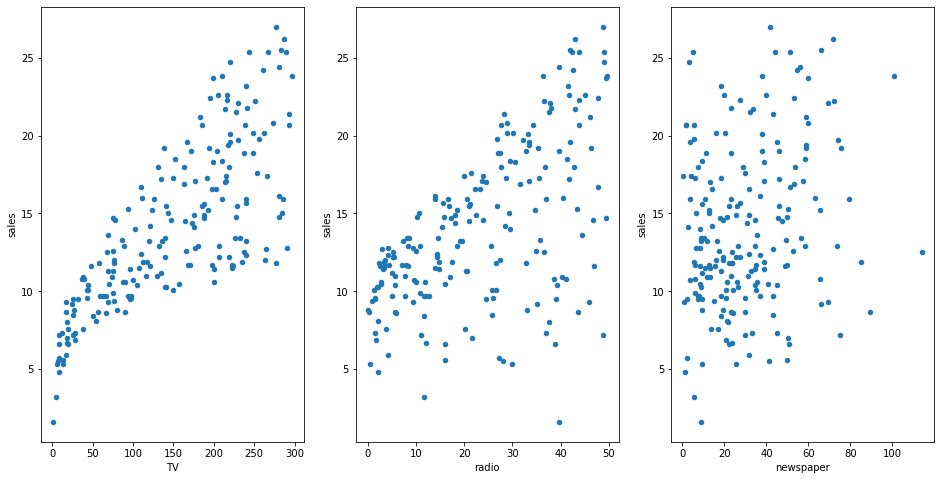

In [10]:
fig,axs = plt.subplots(1,3)
df.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
df.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
plt.show()

From the above graph:

Sales v/s TV: Here we can see that there is some linear relation between them as they are linearly dependent.
    
Sales v/ radio: here we analyse that there is some linear relation and seems to be like consists outliers too that we                  further analyse by using boxplot.
    
Sales v/s newspaper: Here we see there not such linear relation between them. but we have to do further analysis to make sure.

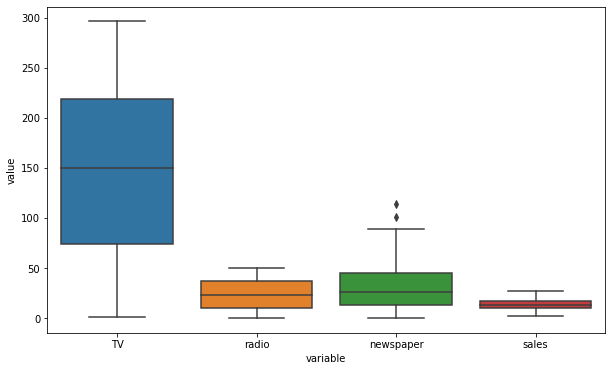

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

Here we come to know that in newsaper there are some outliers. while in all other columns there is no outliers.

## Removing outliers

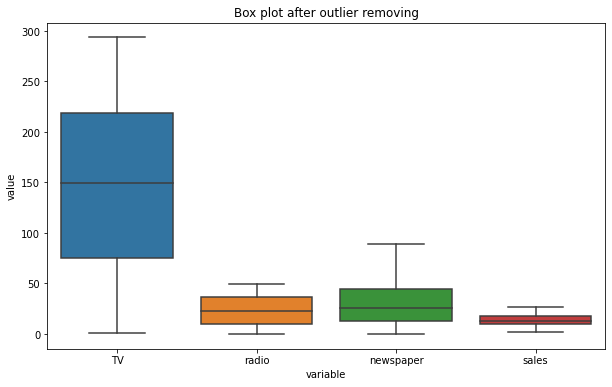

In [12]:
def drop_outliers(df, newspaper):
    iqr = 1.5*(np.percentile(df['newspaper'],75)-np.percentile(df['newspaper'],25))
    df.drop(df[df['newspaper']>(iqr+np.percentile(df['newspaper'],75))].index, inplace=True)

drop_outliers(df,'newspaper')
plt.figure(figsize=(10,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("Box plot after outlier removing")
plt.show()

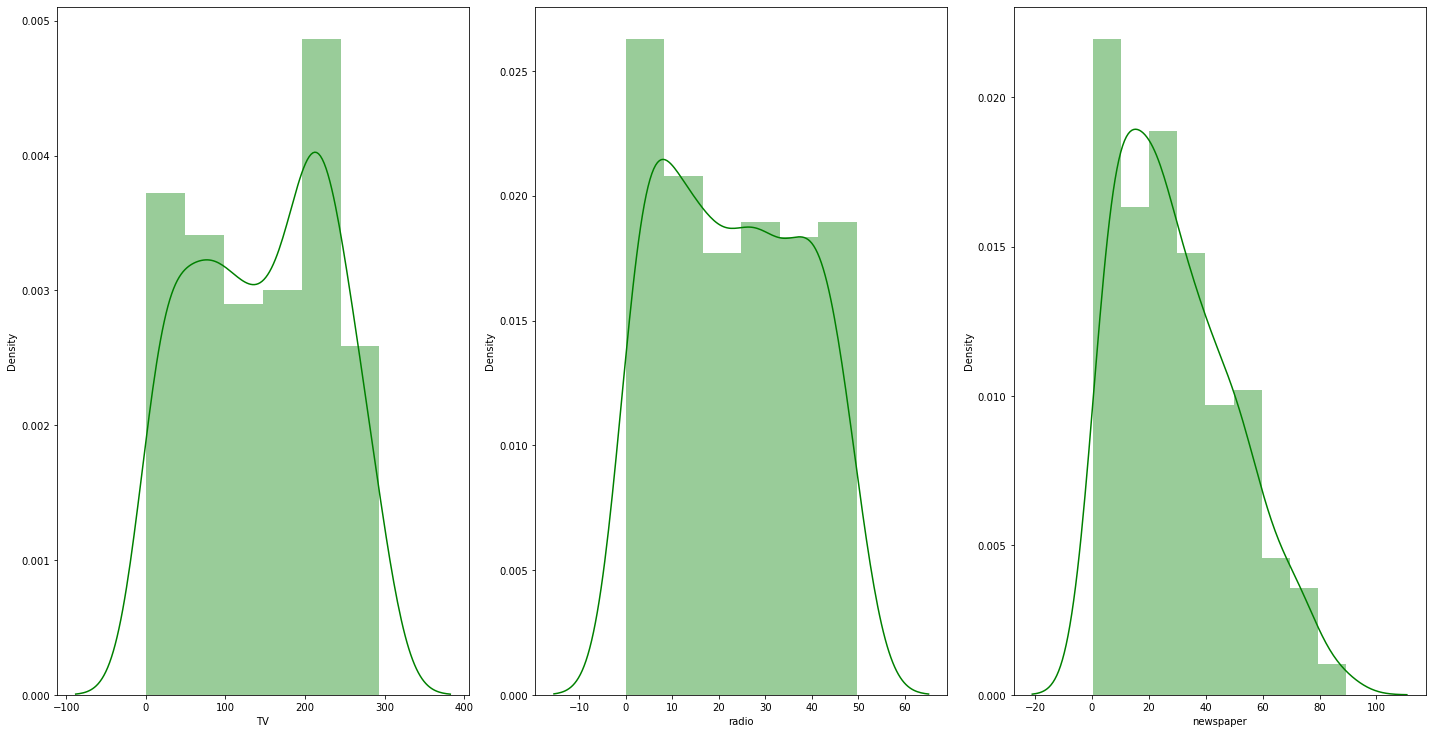

In [13]:
plt.figure(figsize=(20,20))
graph=1
for col in df.iloc[:,:-1]:
    if graph<5:
    
        plt.subplot(2,3,graph)
        sns.distplot(df[col],color='green')
    graph+=1
plt.tight_layout()

In [14]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

from above information we can conclude that the newspaper is skewed as it is not in range -0.5 to 0.5

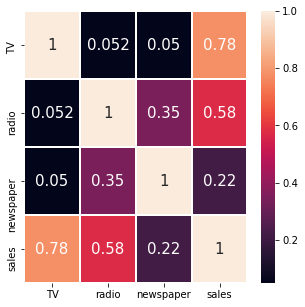

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.show()

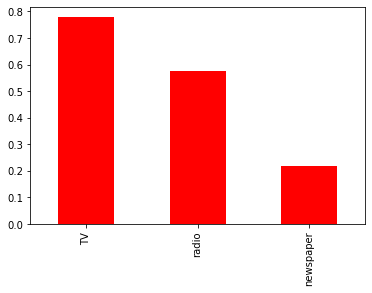

In [16]:
df[['TV','radio','newspaper']].corrwith(df['sales']).plot(kind='bar',color='red')
plt.show()

In [17]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()

In [18]:
lm.pvalues

Intercept    3.417928e-17
TV           5.715535e-80
radio        5.535441e-54
newspaper    8.517770e-01
dtype: float64

In [19]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           8.35e-95
Time:                        18:57:55   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
radio          0.1886      0.009     21.772      0.000       0.171       0.206
newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# import statsmodels.formula.api as smf
lm=smf.ols(formula='sales~TV+radio',data=df).fit()

In [21]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.60e-96
Time:                        18:57:55   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000       2.345       3.518
TV             0.0457      0.001     32.385      0.000       0.043       0.048
radio          0.1880      0.008     23.182      0.000       0.172       0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         423.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

here we see after removing the newspaper column it again gives us 0.89 value of adjusted R-squared.

#### Conclusion of EDA 

Here we conclde that the column:
    
TV: It is continous variable that contributing 78%  for the prediction of sale. And its p_value is less than 0.05 so it can be used as feature.
    
radio: It is continous variable that contributing 58%  for the prediction of sale. And its p_value is less than 0.05 so it can be used as feature.
    
newspaper: It is continous variable that contributing 23%  for the prediction of sale. But its p_value is more than 0.05 so it cannot be used as feature.

In [22]:
df.drop_duplicates(inplace=True)

removing duplicates

In [23]:
df.drop(['newspaper'], axis=1, inplace=True)

removed columns "newspaper"

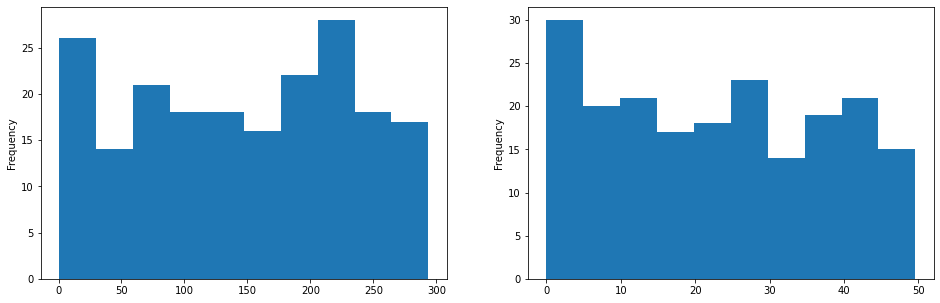

In [24]:
fig,axs=plt.subplots(1,2)
df['TV'].plot(kind='hist',ax=axs[0],figsize=(16,5))
df["radio"].plot(kind='hist',ax=axs[1])
plt.show()

TV,radio are distributed normally and not skewed.

In [25]:
df.shape

(198, 3)

In [26]:
data_loss=(200-198)/200
data_loss

0.01

data loss is 1.0%

In [27]:
df.describe()

,TV,radio,sales
count,198.000000,198.000000,198.000000
mean,146.688384,23.130808,13.980808
std,85.443221,14.862111,5.196097
min,0.700000,0.000000,1.600000
25%,74.800000,9.925000,10.325000
50%,149.750000,22.400000,12.900000
75%,218.475000,36.325000,17.375000
max,293.600000,49.600000,27.000000


Here we can see that the TV has min value i.e. 0.7 and radio has min value i.e. 0.0 that can be quite possible. Sometimes the producer is not spending much money on advertisement and also got the benefits.

## Model Developement

In [28]:
X=df[["TV","radio"]]
Y=df.sales

Splitting data into fetures & labels.

Here X is our features & Y is our label.

In [29]:
mms=MinMaxScaler()
X_scaled=mms.fit_transform(X)

Standarized the features using MinMaxScalar technique

In [30]:
max_accuracy=0
for i in range(1,150):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    accuracy=r2_score(Y_test,Y_pred)*100
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        rs=i
print(f"The highest accuracy is {max_accuracy} at random state {rs}")

The highest accuracy is 94.7852563461425 at random state 90


In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=rs)

Here we split the training dataset & test dataset at random state rs i.e. 92 where we get the high accuracy

In [32]:
Linear=LinearRegression()
DecisionTree=DecisionTreeRegressor()
knn=KNeighborsRegressor()
RandomForest=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()

In [33]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost]
acc_models={}
for model in algo:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print("-"*60)
    acc_models[model]=round(r2_score(Y_test,Y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LinearRegression() has:: 
	 Accuracy :: 94.8% 
	 Mean Absolute Error is :: 1.0201503706515989 
	 Mean Squared Error is :: 1.5720679103538036 
	 Root Mean Squared Error is :: 1.2538213231373134
------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeRegressor() has:: 
	 Accuracy :: 97.4% 
	 Mean Absolute Error is :: 0.6525 
	 Mean Squared Error is :: 0.7717499999999996 
	 Root Mean Squared Error is :: 0.8784930278607791
------------------------------------------------------------


------------------------------------------------------------
The model RandomForestRegressor() has:: 
	 Accuracy :: 98.4% 
	 Mean Absolute Error is :: 0.5535749999999984 
	 Mean Squared Error is :: 0.4776082749999978 
	 Root Mean Squared Error is :: 0.6910920886538912
------------------------------------------------------------


---------------------

In [34]:
acc_models

{LinearRegression(): 94.8,
 DecisionTreeRegressor(): 97.4,
 RandomForestRegressor(): 98.4,
 KNeighborsRegressor(): 98.4,
 AdaBoostRegressor(): 95.8}

Here we get the maximum r2-score of each model

## Crooss-Vaidation

In [35]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_scaled,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LinearRegression()
-------------------------


Mean CV Score of model LinearRegression():: 0.8917516553872963 at k-fold::2

Mean CV Score of model LinearRegression():: 0.8904101563704921 at k-fold::3

Mean CV Score of model LinearRegression():: 0.8897753921938709 at k-fold::4

Mean CV Score of model LinearRegression():: 0.8877746326163092 at k-fold::5

Mean CV Score of model LinearRegression():: 0.8876904957751907 at k-fold::6

Mean CV Score of model LinearRegression():: 0.8854980435522061 at k-fold::7

Mean CV Score of model LinearRegression():: 0.8904766602868286 at k-fold::8

Mean CV Score of model LinearRegression():: 0.8826667532285979 at k-fold::9


DecisionTreeRegressor()
-------------------------


Mean CV Score of model DecisionTreeRegressor():: 0.9360180351572571 at k-fold::2

Mean CV Score of model DecisionTreeRegressor():: 0.9604049153322786 at k-fold::3

Mean CV Score of model DecisionTreeRegressor():: 0.9599918494936929 at k-fold::4

Mean CV Score of model DecisionTreeRe

In [36]:
CVmodel

{'LinearRegression()': [0.8917516553872963],
 'DecisionTreeRegressor()': [0.9617588839930102],
 'RandomForestRegressor()': [0.9818636927166962],
 'KNeighborsRegressor()': [0.9740051347189769],
 'AdaBoostRegressor()': [0.959019882425769]}

In [37]:
acc_value=list(acc_models.values ( ))

m=list(CVmodel.keys())

print("The least difference between the r2-score and CV score of each model is::\n")
for i in range(5):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-acc_value[i]),2)}")

The least difference between the r2-score and CV score of each model is::

LinearRegression()::5.62
DecisionTreeRegressor()::1.22
RandomForestRegressor()::0.21
KNeighborsRegressor()::1.0
AdaBoostRegressor()::0.1


## Plotting regplot graph for Adaboost model

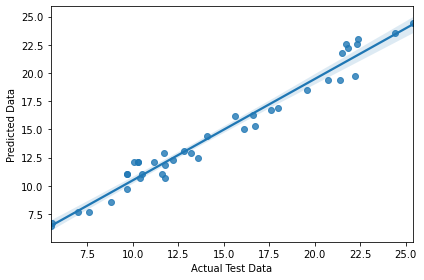

In [38]:
ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we analyse that the data points are very close to the best fit line. That means the residual is less.

## Regularization

In [39]:
lasso=Lasso()
parameters={"alpha":np.arange(0.0001,0.1,0.001),'normalize':[True,False],'max_iter':[1000,1500,2000]}
grid=GridSearchCV(lasso,parameters)
grid.fit(X_train,Y_train)
grid.best_params_

{'alpha': 0.0001, 'max_iter': 1000, 'normalize': False}

Here we get the best paameter for Lasso. So, that we can see our model is overfitted/underfitted or not

In [40]:
lasso=Lasso(alpha= 0.0001, max_iter= 1000, normalize=False)
lasso.fit(X_train,Y_train)
pred=lasso.predict(X_test)
r2_score(Y_test,pred)*100

94.78419202303951

Here we can see that our model is not overfitted or underfitted as the r2 scoe Lasso model i.e. 94.77 is less or almost similiar with AdaBosst regressor model r2_score that is 95.86.

## Hyper Parameter Tuning

In [41]:
params={"base_estimator":[Linear,DecisionTree,RandomForest],"n_estimators":[43,45,47],'learning_rate':[1.1,1.2,1.3],"loss":['linear','square','exponential']}

In [42]:
grid=GridSearchCV(ada,param_grid=params)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [LinearRegression(),
                                            DecisionTreeRegressor(),
                                            RandomForestRegressor()],
                         'learning_rate': [1.1, 1.2, 1.3],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [43, 45, 47]})

In [43]:
grid.best_estimator_

AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1.3,
                  n_estimators=45)

In [44]:
ada=AdaBoostRegressor(base_estimator=RandomForestRegressor(), learning_rate=1.2, n_estimators=45)
ada.fit(X_train,Y_train)
Y_pred=ada.predict(X_test)

### Model evalution

In [45]:
print(f"The model AdaBoost Regressor has:: \n\t Accuracy :: {round(r2_score(Y_test,Y_pred)*100,1)}% \n\t Mean Absolute Error is :: {mean_absolute_error(Y_test,Y_pred)} \n\t Mean Squared Error is :: {mean_squared_error(Y_test,Y_pred)} \n\t Root Mean Squared Error is :: {np.sqrt(mean_squared_error(Y_test,Y_pred))}")

The model AdaBoost Regressor has:: 
	 Accuracy :: 98.6% 
	 Mean Absolute Error is :: 0.5394000000000027 
	 Mean Squared Error is :: 0.41290970000000415 
	 Root Mean Squared Error is :: 0.6425805007934836


Here we can see that our accuracy has increased & The mean_absolute Error ,Mean_sqaured_error, Root_mean_sqaured_error has decreased.

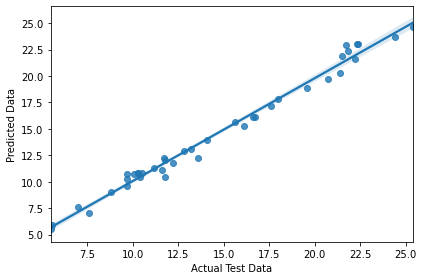

In [46]:
sns.regplot(Y_test,Y_pred)
plt.xlabel("Actual Test Data")
plt.ylabel("Predicted Data")
plt.tight_layout()

Here we can see that the points are now much closer than the earlier adaboost model with default parameter to the best fit line, Its due to decrease in mean absolute error, mean Squared Error,& Root mean squared error.

## Save Model

In [47]:
import joblib
joblib.dump(ada,'Advertisement_model.pkl')

['Advertisement_model.pkl']